### Linear Regression Machine Learning Project for House Price Prediction

#### import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning / Deep Learning
#######################################
# Linear Regression 
df = pd.read_csv('housing.csv')
# Exploratory Data Analysis (EDA) 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [2]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [3]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [4]:
target = 'Price'  # ? categorical ? Numerical
feats = [] 
df['Price'].nunique()

5000

<Axes: xlabel='Price', ylabel='Count'>

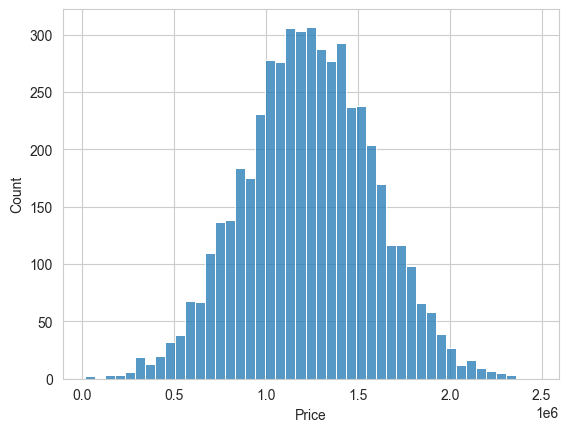

In [5]:
sns.set_style('whitegrid')
sns.histplot(data=df, x=target)

In [6]:
cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Address']
for col in cols:
    print(col,':',df[col].nunique())

Avg. Area Income : 5000
Avg. Area House Age : 5000
Avg. Area Number of Rooms : 5000
Avg. Area Number of Bedrooms : 255
Area Population : 5000
Address : 5000


In [7]:
5000/255

19.607843137254903

In [8]:
(100*20)/5000

0.4

In [9]:
5000/4

1250.0

In [10]:
df['Address'].sample(10)

190     089 Wilson Forks Suite 185\nEast Gina, PA 9878...
4113    464 Allen Locks Suite 511\nJamesborough, MT 58...
1899        5486 Conley Islands\nHeathfort, SD 91390-8070
4333         14469 Thomas Garden\nRileyton, VA 94449-1369
4613    30247 Fuller Streets\nPort Patrick, MP 52706-6844
3683    4173 Grant Village Apt. 373\nPort Jerrybury, O...
1802       597 Brock Haven\nNew Alexisberg, MH 24498-5838
595          5821 Kelly Ferry\nDeborahtown, PA 82936-6211
592     1293 Jones Lane Apt. 214\nNelsonville, RI 3341...
1566    571 Fletcher Mountains Apt. 828\nNew Vincentto...
Name: Address, dtype: object

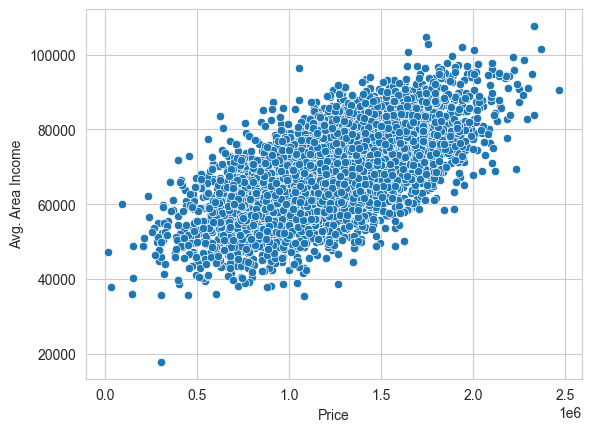

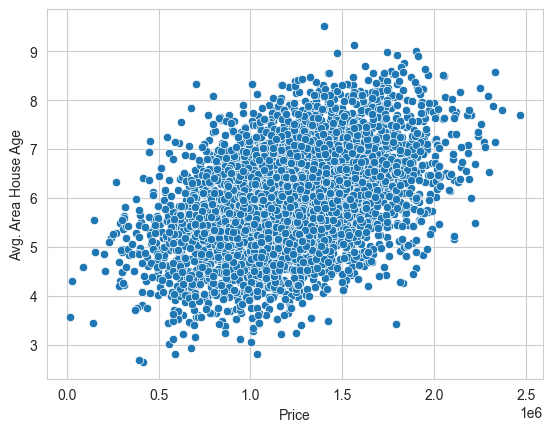

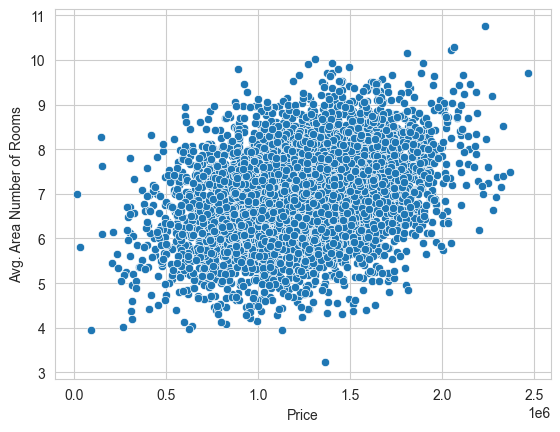

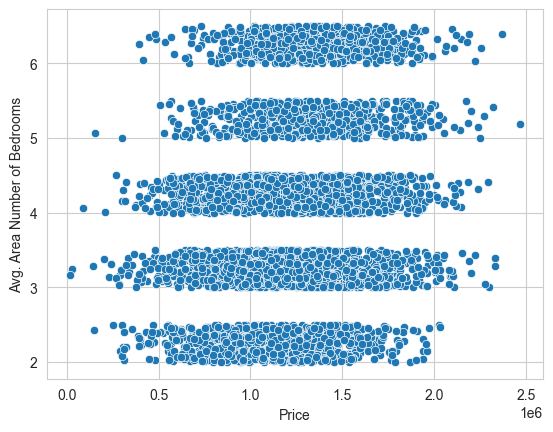

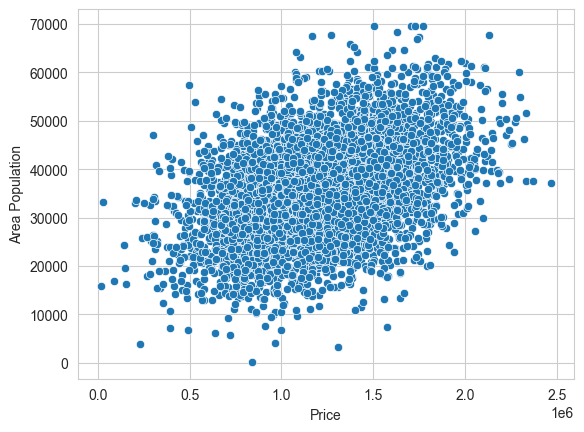

In [11]:
drop_cols = ['Address']
num_cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']
for col in num_cols:
    sns.scatterplot(data=df, x=target, y=col)
    plt.show()

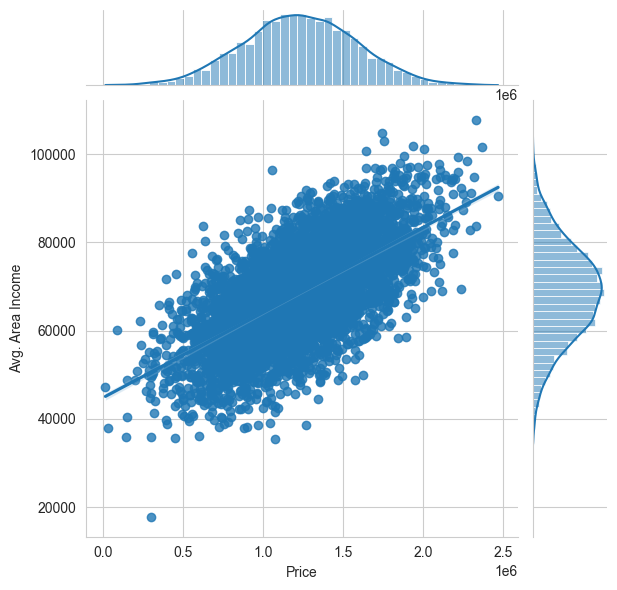

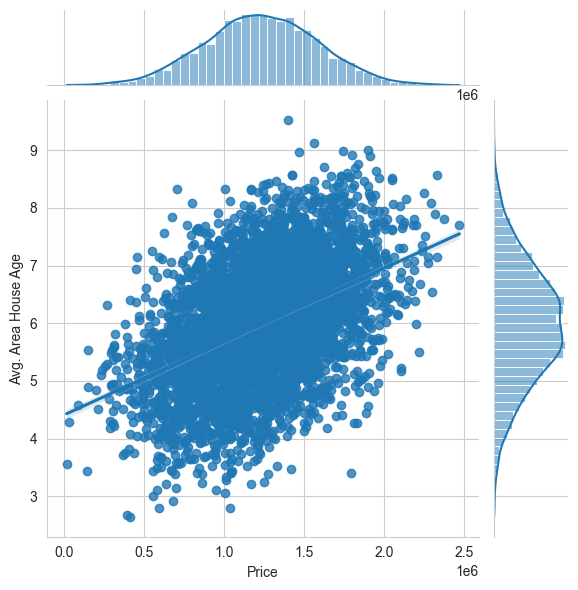

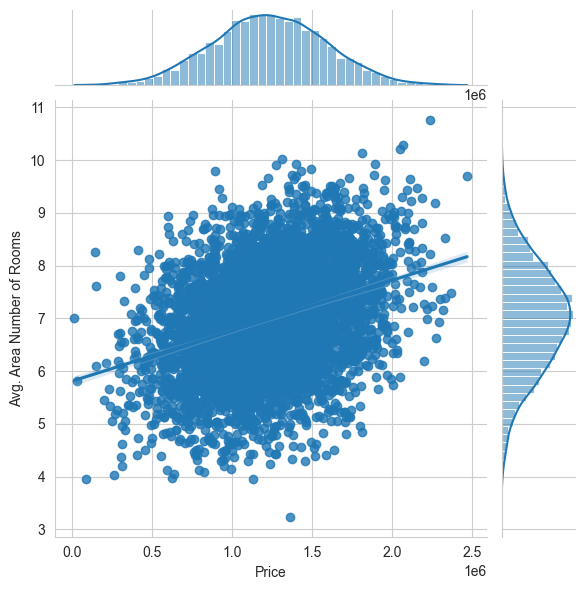

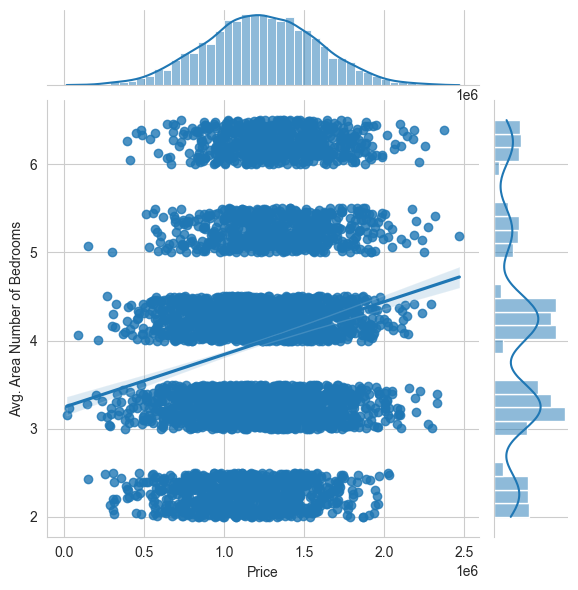

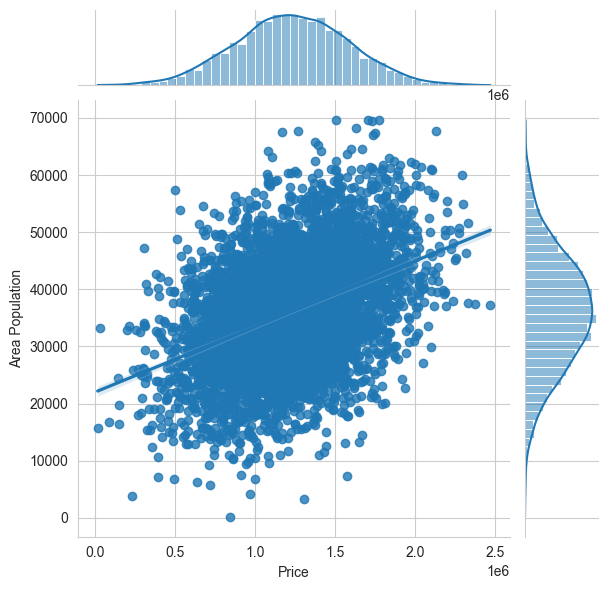

In [12]:
for col in num_cols:
    sns.jointplot(data=df, x=target, y=col, kind='reg')
    plt.show()

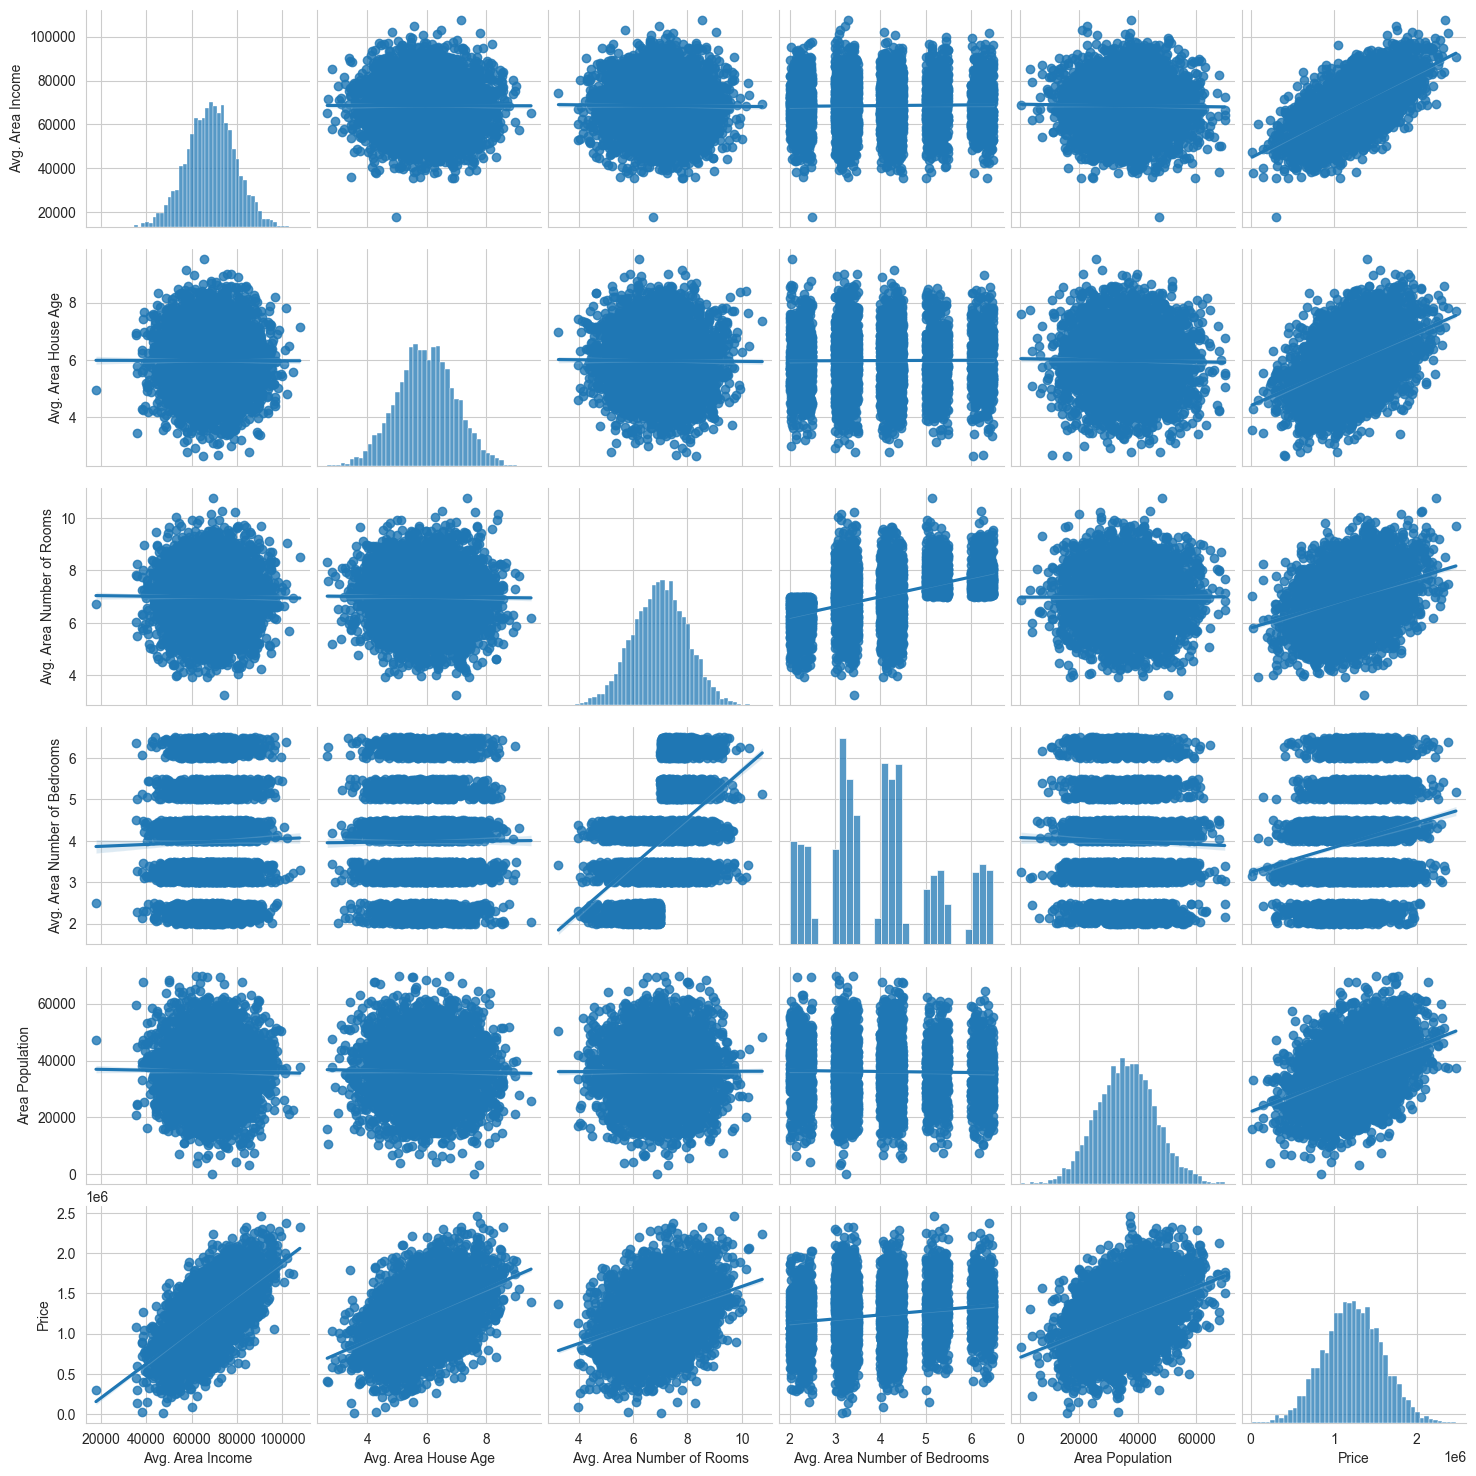

In [13]:
sns.pairplot(df, kind='reg')

<Axes: >

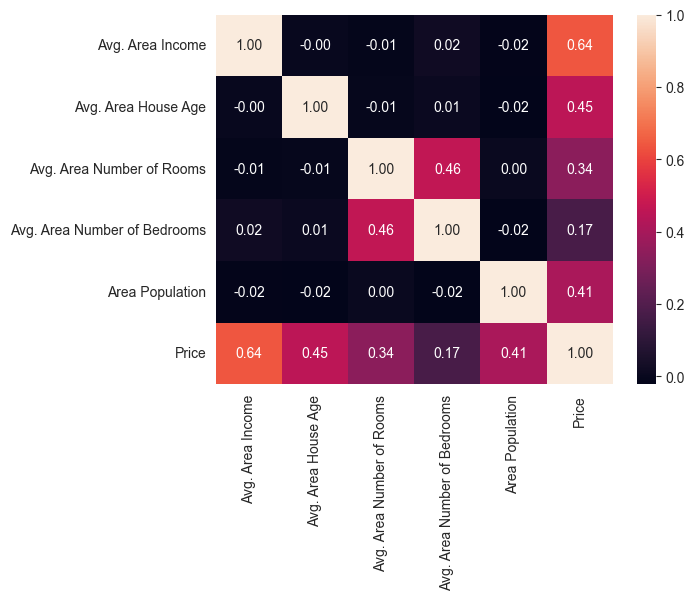

In [14]:
sns.heatmap(df.drop(drop_cols,axis=1).corr(), annot=True, fmt='.2f')

In [15]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [16]:
feats += ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Area Population']

In [17]:
target

'Price'

In [18]:
features = df[feats]
label = df[target]
features.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.458574,5.682861,7.009188,23086.800503
1,79248.642455,6.002900,6.730821,40173.072174
2,61287.067179,5.865890,8.512727,36882.159400
3,63345.240046,7.188236,5.586729,34310.242831
4,59982.197226,5.040555,7.839388,26354.109472


In [24]:
features.shape

(5000, 4)

In [20]:
# Data Splitting -> Train Data and Test Data
from sklearn.model_selection import train_test_split

# Train the model
from sklearn.linear_model import LinearRegression

In [21]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [22]:
k = train_test_split(features, label, test_size = 0.25, random_state = 40)
train_feat, test_feat, train_label, test_label = k 
train_feat.shape

(3750, 4)

In [23]:
train_label.shape

(3750,)

In [25]:
model = LinearRegression().fit(train_feat, train_label)
model

LinearRegression()

In [26]:
# Evaluate The Trained Model
###############################
# Performance Indices
    # Regression
        # Errors - Mean Absoulte Error (MAE), MSE, RMSE, r2Error
    # Classification
        # Confusion Matrix
        # Precision
        # Recall
        # r2Score
help(model.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, whe

In [27]:
model.score(test_feat, test_label) * 100

91.44901090753275

In [28]:
# Deploy the model
model.feature_names_in_

array(['Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Area Population'], dtype=object)

In [29]:
round(3456.37428678365743,2)

3456.37

In [30]:
inc = eval(input('Enter Income:'))
age = eval(input('Enter House Age:'))
room = eval(input('Enter num of rooms:'))
pop = eval(input('Enter population:'))
query = [[inc,age,room,pop]]
query = pd.DataFrame(query, columns=model.feature_names_in_)
pred = model.predict(query)
print(round(pred[0],2))

5257141.15


In [31]:
model.coef_

array([2.15020699e+01, 1.65916430e+05, 1.21783809e+05, 1.50686194e+01])

In [32]:
coeff = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=['Coeff'])
coeff

,Coeff
Avg. Area Income,21.502070
Avg. Area House Age,165916.429626
Avg. Area Number of Rooms,121783.809160
Area Population,15.068619


In [33]:
test_label_pred = model.predict(test_feat)
test_label_pred[0] 

1437663.841146266

In [34]:
test_label.values[0] 

1435769.7688373898

<Axes: ylabel='Price'>

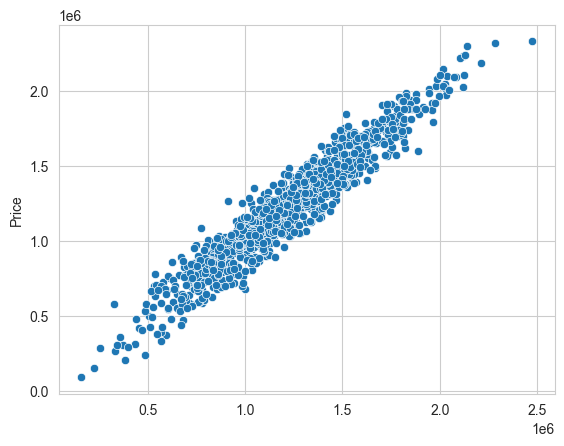

In [35]:
sns.scatterplot(x = test_label_pred, y=test_label)

In [36]:
# Summary
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('housing.csv')
target = 'Price'
feats = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Area Population']
features = df[feats]
label = df[target]
train_feat, test_feat, train_label, test_label = train_test_split(features, label, test_size = 0.25, random_state = 40)
model = LinearRegression().fit(train_feat, train_label)
print('Test Score: ',round(model.score(test_feat, test_label) * 100, 2), '%')
print('Train Score: ',round(model.score(train_feat, train_label) * 100, 2), '%')

# Save the Model
pd.to_pickle(model, 'housePricePredictor.pkl')

Test Score:  91.45 %
Train Score:  91.91 %


In [37]:
# Load Model
house = pd.read_pickle('housePricePredictor.pkl')
house
# Use the Prediction Model
inc = eval(input('Enter Income:'))
age = eval(input('Enter House Age:'))
room = eval(input('Enter num of rooms:'))
pop = eval(input('Enter population:'))
query = [[inc,age,room,pop]]
query = pd.DataFrame(query, columns=model.feature_names_in_)
pred = house.predict(query)
print(round(pred[0],2)) 

5504475.92
